In [1]:
library(rliger)
library(Seurat)
library(cluster)
library(MOFA2)
library(Signac)
library(umap)
seurat <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_seurat.rds")
mofa <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_mofa.rds")
liger <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_liger.rds")
mcia <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_mcia.rds")
icluster <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_icluster.rds")
tica <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_tica.rds")

Loading required package: cowplot

Loading required package: Matrix

Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




In [ ]:
# silhoutte

In [ ]:
## 未整合前
# RNA

In [2]:
seurat

An object of class Seurat 
709875 features across 378 samples within 3 assays 
Active assay: SCT (16668 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 5 dimensional reductions calculated: lsi, umap.atac, pca, umap.rna, wnn.umap

In [4]:
cluster <- samples_metadata(mofa)$orig.ident

In [5]:
distance.rna <- Embeddings(object = seurat[["umap.rna"]])
silhouette_rna <- silhouette(as.integer(as.factor(cluster)), dist(as.data.frame(distance.rna)))

In [6]:
summary(silhouette_rna)

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(as.data.frame(distance.rna))) :
 Cluster sizes and average silhouette widths:
       96        91        95        96 
0.8572307 0.7911935 0.7924248 0.7527718 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.8758  0.8073  0.8508  0.7985  0.8834  0.9053 

In [7]:
sil.rna.sum <- data.frame(cluster = silhouette_rna[,"cluster"], score = silhouette_rna[,"sil_width"])
sil.rna.sum$method <- "RNA-seq"

In [ ]:
# ATAC

In [8]:
distance.atac <- Embeddings(object = seurat[["umap.atac"]])
silhouette_atac <- silhouette(as.integer(as.factor(cluster)), dist(as.data.frame(distance.atac)))
summary(silhouette_atac)

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(as.data.frame(distance.atac))) :
 Cluster sizes and average silhouette widths:
         96          91          95          96 
-0.02307063  0.58863886  0.82158284  0.14214151 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.81345  0.03098  0.30256  0.37843  0.78558  0.85612 

In [9]:
sil.atac.sum <- data.frame(cluster = silhouette_atac[,"cluster"], score = silhouette_atac[,"sil_width"])
sil.atac.sum$method <- "ATAC-seq"

In [ ]:
# Seurat

In [10]:
distance.seurat <- Embeddings(object = seurat[["wnn.umap"]])
silhouette_seurat <- silhouette(as.integer(as.factor(cluster)), dist(as.data.frame(distance.seurat)))
summary(silhouette_seurat)
sil.seurat.sum <- data.frame(cluster = silhouette_seurat[,"cluster"], score = silhouette_seurat[,"sil_width"])
sil.seurat.sum$method <- "Seurat"

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(as.data.frame(distance.seurat))) :
 Cluster sizes and average silhouette widths:
       96        91        95        96 
0.8473086 0.5785851 0.8270488 0.7811337 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.8142  0.7359  0.8177  0.7607  0.8552  0.8985 

In [ ]:
# mofa

In [12]:
mofa <- run_umap(mofa)

In [13]:
silhouette_mofa <- silhouette(as.integer(as.factor(cluster)), dist(mofa@dim_red$UMAP[,c(2,3)]))
summary(silhouette_mofa)
sil.mofa.sum <- data.frame(cluster = silhouette_mofa[,"cluster"], score = silhouette_mofa[,"sil_width"])
sil.mofa.sum$method <- "MOFA2"

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(mofa@dim_red$UMAP[,  from     c(2, 3)])) :
 Cluster sizes and average silhouette widths:
         96          91          95          96 
 0.30966712  0.23324064  0.25975025 -0.02147098 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.51795  0.04807  0.25353  0.19462  0.47218  0.52910 

In [ ]:
# liger

In [8]:
library(cluster)

In [1]:
library(rliger)
liger <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_liger.rds")

Loading required package: cowplot

Loading required package: Matrix

Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [50]:
liger@H.norm

JK1_1_0,0.000000e+00,0.035686821,4.414601e-06,1.964431e-03,0.0048400666,0.0012155060,0.0016210221,4.367905e-05,0.0026986730,0.0000000000,3.489397e-04,0.000000e+00,0.0023321319,5.242962e-03,0.0029172945
JK1_10_0,0.000000e+00,0.018939661,0.000000e+00,7.605947e-04,0.0008220818,0.0010882185,0.0062961612,0.000000e+00,0.0015679409,0.0151939168,3.243128e-03,0.000000e+00,0.0005497462,2.125433e-03,0.0000000000
JK1_11_0,1.023180e-06,0.032104273,1.059998e-05,5.012523e-04,0.0007903614,0.0022199533,0.0022570059,8.993566e-06,0.0030144774,0.0038660503,4.272081e-03,0.000000e+00,0.0009849309,2.955745e-03,0.0013992293
JK1_12_0,1.381730e-05,0.027894747,0.000000e+00,2.525986e-04,0.0014157400,0.0022938338,0.0019280231,1.243452e-04,0.0057996090,0.0052466299,1.771612e-03,0.000000e+00,0.0013280418,2.749348e-03,0.0016544853
JK1_13_0,8.377350e-05,0.032123890,5.851761e-05,2.333886e-03,0.0031030664,0.0002289175,0.0006466646,1.590413e-05,0.0036141193,0.0029318450,2.335035e-03,0.000000e+00,0.0019611260,5.791014e-04,0.0022571019
JK1_14_0,0.000000e+00,0.030163546,4.566369e-05,4.830349e-04,0.0013502372,0.0032432949,0.0012933462,1.434249e-05,0.0081294704,0.0009476192,6.970293e-04,1.839426e-05,0.0003688094,3.283200e-03,0.0035620003
JK1_15_0,0.000000e+00,0.026990376,0.000000e+00,9.828490e-04,0.0010421654,0.0015098853,0.0007112682,0.000000e+00,0.0057119954,0.0067894509,1.608757e-04,0.000000e+00,0.0021316587,4.872956e-03,0.0004704380
JK1_16_0,3.457673e-05,0.025294571,0.000000e+00,1.229358e-03,0.0012843348,0.0013506936,0.0018825789,0.000000e+00,0.0006941161,0.0115482120,3.498607e-03,0.000000e+00,0.0018311328,0.000000e+00,0.0000000000
JK1_17_0,4.033429e-05,0.033791224,0.000000e+00,1.418903e-03,0.0002056774,0.0022206679,0.0016368190,1.050875e-05,0.0056065694,0.0011123134,4.821174e-04,0.000000e+00,0.0014738258,3.778257e-03,0.0014989822
JK1_18_0,0.000000e+00,0.029470759,0.000000e+00,1.835703e-03,0.0003979529,0.0030794113,0.0015628363,0.000000e+00,0.0060621580,0.0033093012,1.081200e-03,0.000000e+00,0.0006459014,3.460769e-03,0.0010662475
JK1_19_0,7.815431e-05,0.041244701,0.000000e+00,7.284249e-04,0.0023804853,0.0000000000,0.0028609542,0.000000e+00,0.0005296330,0.0016286060,8.660463e-04,0.000000e+00,0.0001109041,0.000000e+00,0.0000000000


In [51]:
liger@tsne.coords

JK1_1_0,-3.52533885,-6.050376
JK1_10_0,-2.36717221,-7.151400
JK1_11_0,-3.26012465,-6.207846
JK1_12_0,-2.54395529,-6.506970
JK1_13_0,-3.14587518,-6.280262
JK1_14_0,-3.07540747,-5.955619
JK1_15_0,-2.48554798,-6.584202
JK1_16_0,-2.39628264,-6.749657
JK1_17_0,-3.53706905,-5.913305
JK1_18_0,-2.75754949,-6.392822
JK1_19_0,-4.11429235,-6.324689


In [17]:
dim(liger@tsne.coords)

[1] 728   2

In [52]:
liger@clusters

JK1_1_0        JK1_10_0        JK1_11_0        JK1_12_0        JK1_13_0 
              2               2               2               2               2 
       JK1_14_0        JK1_15_0        JK1_16_0        JK1_17_0        JK1_18_0 
              2               2               2               2               2 
       JK1_19_0         JK1_2_0        JK1_21_0        JK1_22_0        JK1_24_0 
              2               2              10               2               2 
       JK1_26_0        JK1_28_0         JK1_3_0        JK1_31_0        JK1_33_0 
              2               2               2               2              14 
       JK1_34_0        JK1_36_0        JK1_38_0        JK1_39_0        JK1_40_0 
             10               2              14               2               2 
       JK1_42_0        JK1_45_0        JK1_47_0        JK1_49_0         JK1_5_0 
             14              10               2               2               2 
       JK1_51_0        JK1_53_0         JK1_6_0        JK1_61_0        JK1_63_0 
             14               2               2               2              14 
       JK1_66_0        JK1_68_0        JK1_69_0         JK1_7_0        JK1_70_0 
              2               2              10              10               2 
       JK1_71_0        JK1_72_0        JK1_73_0        JK1_74_0        JK1_75_0 
              2              10               2               2               2 
       JK1_77_0        JK1_78_0         JK1_8_0        JK1_80_0        JK1_81_0 
              2               2              10               2               2 
       JK1_82_0        JK1_83_0        JK1_84_0        JK1_85_0        JK1_86_0 
              2               2               2               2               2 
       JK1_87_0        JK1_88_0        JK1_89_0         JK1_9_0        JK1_90_0 
              2               2              10               2              14 
       JK1_91_0        JK1_92_0        JK1_93_0        JK1_94_0        JK1_95_0 
              2               2               2               2               2 
     Jurkat_1_0     Jurkat_10_0     Jurkat_11_0     Jurkat_12_0     Jurkat_13_0 
             14              14              10              10              14 
    Jurkat_14_0     Jurkat_15_0     Jurkat_16_0     Jurkat_17_0     Jurkat_18_0 
             10              10              14              10              10 
    Jurkat_19_0      Jurkat_2_0     Jurkat_20_0     Jurkat_21_0     Jurkat_22_0 
             10              10              14              14              10 
    Jurkat_23_0     Jurkat_24_0     Jurkat_25_0     Jurkat_26_0     Jurkat_27_0 
             14              10              10              10              10 
    Jurkat_28_0     Jurkat_29_0      Jurkat_3_0     Jurkat_30_0     Jurkat_31_0 
             14              10              10              10              10 
    Jurkat_32_0     Jurkat_33_0     Jurkat_34_0     Jurkat_35_0     Jurkat_36_0 
             14              10              10              10              10 
    Jurkat_37_0     Jurkat_38_0     Jurkat_39_0      Jurkat_4_0     Jurkat_40_0 
             14              10              10              14              10 
    Jurkat_42_0     Jurkat_43_0     Jurkat_44_0     Jurkat_45_0     Jurkat_46_0 
             10              10              10              10              14 
    Jurkat_47_0     Jurkat_48_0     Jurkat_49_0      Jurkat_5_0     Jurkat_50_0 
             14              10              10              10              10 
    Jurkat_51_0     Jurkat_52_0     Jurkat_53_0     Jurkat_54_0     Jurkat_55_0 
             10              10              10              10              10 
    Jurkat_56_0     Jurkat_57_0     Jurkat_58_0     Jurkat_59_0      Jurkat_6_0 
             10              14              10              10              10 
    Jurkat_60_0     Jurkat_61_0     Jurkat_62_0     Jurkat_63_0     Jurkat_64_0 
             10              14        

In [62]:
strsplit(rownames(liger@tsne.coords), "_")

[[1]]
[1] "JK1" "1"   "0"  

[[2]]
[1] "JK1" "10"  "0"  

[[3]]
[1] "JK1" "11"  "0"  

[[4]]
[1] "JK1" "12"  "0"  

[[5]]
[1] "JK1" "13"  "0"  

[[6]]
[1] "JK1" "14"  "0"  

[[7]]
[1] "JK1" "15"  "0"  

[[8]]
[1] "JK1" "16"  "0"  

[[9]]
[1] "JK1" "17"  "0"  

[[10]]
[1] "JK1" "18"  "0"  

[[11]]
[1] "JK1" "19"  "0"  

[[12]]
[1] "JK1" "2"   "0"  

[[13]]
[1] "JK1" "21"  "0"  

[[14]]
[1] "JK1" "22"  "0"  

[[15]]
[1] "JK1" "24"  "0"  

[[16]]
[1] "JK1" "26"  "0"  

[[17]]
[1] "JK1" "28"  "0"  

[[18]]
[1] "JK1" "3"   "0"  

[[19]]
[1] "JK1" "31"  "0"  

[[20]]
[1] "JK1" "33"  "0"  

[[21]]
[1] "JK1" "34"  "0"  

[[22]]
[1] "JK1" "36"  "0"  

[[23]]
[1] "JK1" "38"  "0"  

[[24]]
[1] "JK1" "39"  "0"  

[[25]]
[1] "JK1" "40"  "0"  

[[26]]
[1] "JK1" "42"  "0"  

[[27]]
[1] "JK1" "45"  "0"  

[[28]]
[1] "JK1" "47"  "0"  

[[29]]
[1] "JK1" "49"  "0"  

[[30]]
[1] "JK1" "5"   "0"  

[[31]]
[1] "JK1" "51"  "0"  

[[32]]
[1] "JK1" "53"  "0"  

[[33]]
[1] "JK1" "6"   "0"  

[[34]]
[1] "JK1" "61"  "0"  

[[35]]
[1] "JK1" "63"  "0"  

[[36]]
[1] "JK1" "66"  "0"  

[[37]]
[1] "JK1" "68"  "0"  

[[38]]
[1] "JK1" "69"  "0"  

[[39]]
[1] "JK1" "7"   "0"  

[[40]]
[1] "JK1" "70"  "0"  

[[41]]
[1] "JK1" "71"  "0"  

[[42]]
[1] "JK1" "72"  "0"  

[[43]]
[1] "JK1" "73"  "0"  

[[44]]
[1] "JK1" "74"  "0"  

[[45]]
[1] "JK1" "75"  "0"  

[[46]]
[1] "JK1" "77"  "0"  

[[47]]
[1] "JK1" "78"  "0"  

[[48]]
[1] "JK1" "8"   "0"  

[[49]]
[1] "JK1" "80"  "0"  

[[50]]
[1] "JK1" "81"  "0"  

[[51]]
[1] "JK1" "82"  "0"  

[[52]]
[1] "JK1" "83"  "0"  

[[53]]
[1] "JK1" "84"  "0"  

[[54]]
[1] "JK1" "85"  "0"  

[[55]]
[1] "JK1" "86"  "0"  

[[56]]
[1] "JK1" "87"  "0"  

[[57]]
[1] "JK1" "88"  "0"  

[[58]]
[1] "JK1" "89"  "0"  

[[59]]
[1] "JK1" "9"   "0"  

[[60]]
[1] "JK1" "90"  "0"  

[[61]]
[1] "JK1" "91"  "0"  

[[62]]
[1] "JK1" "92"  "0"  

[[63]]
[1] "JK1" "93"  "0"  

[[64]]
[1] "JK1" "94"  "0"  

[[65]]
[1] "JK1" "95"  "0"  

[[66]]
[1] "Jurkat" "1"      "0"     

[[67]]
[1] "Jurkat" "10"     "0"     

[[68]]
[1] "Jurkat" "11"     "0"     

[[69]]
[1] "Jurkat" "12"     "0"     

[[70]]
[1] "Jurkat" "13"     "0"     

[[71]]
[1] "Jurkat" "14"     "0"     

[[72]]
[1] "Jurkat" "15"     "0"     

[[73]]
[1] "Jurkat" "16"     "0"     

[[74]]
[1] "Jurkat" "17"     "0"     

[[75]]
[1] "Jurkat" "18"     "0"     

[[76]]
[1] "Jurkat" "19"     "0"     

[[77]]
[1] "Jurkat" "2"      "0"     

[[78]]
[1] "Jurkat" "20"     "0"     

[[79]]
[1] "Jurkat" "21"     "0"     

[[80]]
[1] "Jurkat" "22"     "0"     

[[81]]
[1] "Jurkat" "23"     "0"     

[[82]]
[1] "Jurkat" "24"     "0"     

[[83]]
[1] "Jurkat" "25"     "0"     

[[84]]
[1] "Jurkat" "26"     "0"     

[[85]]
[1] "Jurkat" "27"     "0"     

[[86]]
[1] "Jurkat" "28"     "0"     

[[87]]
[1] "Jurkat" "29"     "0"     

[[88]]
[1] "Jurkat" "3"      "0"     

[[89]]
[1] "Jurkat" "30"     "0"     

[[90]]
[1] "Jurkat" "31"     "0"     

[[91]]
[1] "Jurkat" "32"     "0"     

[[92]]
[1] "Jurkat" "33"     "0"     

[[93]]
[1] "Jurkat" "34"     "0"     

[[94]]
[1] "Jurkat" "35"     "0"     

[[95]]
[1] "Jurkat" "36"     "0"     

[[96]]
[1] "Jurkat" "37"     "0"     

[[97]]
[1] "Jurkat" "38"     "0"     

[[98]]
[1] "Jurkat" "39"     "0"     

[[99]]
[1] "Jurkat" "4"      "0"     

[[100]]
[1] "Jurkat" "40"     "0"     

[[101]]
[1] "Jurkat" "42"     "0"     

[[102]]
[1] "Jurkat" "43"     "0"     

[[103]]
[1] "Jurkat" "44"     "0"     

[[104]]
[1] "Jurkat" "45"     "0"     

[[105]]
[1] "Jurkat" "46"     "0"     

[[106]]
[1] "Jurkat" "47"     "0"     

[[107]]
[1] "Jurkat" "48"     "0"     

[[108]]
[1] "Jurkat" "49"     "0"     

[[109]]
[1] "Jurkat" "5"      "0"     

[[110]]
[1] "Jurkat" "50"     "0"     

[[111]]
[1] "Jurkat" "51"     "0"     

[[112]]
[1] "Jurkat" "52"     "0"     

[[113]]
[1] "Jurkat" "53"     "0"     

[[114]]
[1] "Jurkat" "54"     "0"     

[[115]]
[1] "Jurkat" "55"     "0"     

[[116]]
[1] "Jurkat" "56"     "0"     

[[117]]
[1] "Jurkat" "57"     "0"     

[[118]]
[1] "

In [2]:
cluster <- list()
list0 <- strsplit(rownames(liger@tsne.coords), "_")
for (i in c(1:728)){
    if (i <= 351){
        cluster[i] <- list0[[i]][1]
    }
    else {
        cluster[i] <- list0[[i]][2]
    }
}

In [72]:
cluster

[[1]]
[1] "JK1"

[[2]]
[1] "JK1"

[[3]]
[1] "JK1"

[[4]]
[1] "JK1"

[[5]]
[1] "JK1"

[[6]]
[1] "JK1"

[[7]]
[1] "JK1"

[[8]]
[1] "JK1"

[[9]]
[1] "JK1"

[[10]]
[1] "JK1"

[[11]]
[1] "JK1"

[[12]]
[1] "JK1"

[[13]]
[1] "JK1"

[[14]]
[1] "JK1"

[[15]]
[1] "JK1"

[[16]]
[1] "JK1"

[[17]]
[1] "JK1"

[[18]]
[1] "JK1"

[[19]]
[1] "JK1"

[[20]]
[1] "JK1"

[[21]]
[1] "JK1"

[[22]]
[1] "JK1"

[[23]]
[1] "JK1"

[[24]]
[1] "JK1"

[[25]]
[1] "JK1"

[[26]]
[1] "JK1"

[[27]]
[1] "JK1"

[[28]]
[1] "JK1"

[[29]]
[1] "JK1"

[[30]]
[1] "JK1"

[[31]]
[1] "JK1"

[[32]]
[1] "JK1"

[[33]]
[1] "JK1"

[[34]]
[1] "JK1"

[[35]]
[1] "JK1"

[[36]]
[1] "JK1"

[[37]]
[1] "JK1"

[[38]]
[1] "JK1"

[[39]]
[1] "JK1"

[[40]]
[1] "JK1"

[[41]]
[1] "JK1"

[[42]]
[1] "JK1"

[[43]]
[1] "JK1"

[[44]]
[1] "JK1"

[[45]]
[1] "JK1"

[[46]]
[1] "JK1"

[[47]]
[1] "JK1"

[[48]]
[1] "JK1"

[[49]]
[1] "JK1"

[[50]]
[1] "JK1"

[[51]]
[1] "JK1"

[[52]]
[1] "JK1"

[[53]]
[1] "JK1"

[[54]]
[1] "JK1"

[[55]]
[1] "JK1"

[[56]]
[1] "JK1"

[[57]]
[1] "JK1"

[[58]]
[1] "JK1"

[[59]]
[1] "JK1"

[[60]]
[1] "JK1"

[[61]]
[1] "JK1"

[[62]]
[1] "JK1"

[[63]]
[1] "JK1"

[[64]]
[1] "JK1"

[[65]]
[1] "JK1"

[[66]]
[1] "Jurkat"

[[67]]
[1] "Jurkat"

[[68]]
[1] "Jurkat"

[[69]]
[1] "Jurkat"

[[70]]
[1] "Jurkat"

[[71]]
[1] "Jurkat"

[[72]]
[1] "Jurkat"

[[73]]
[1] "Jurkat"

[[74]]
[1] "Jurkat"

[[75]]
[1] "Jurkat"

[[76]]
[1] "Jurkat"

[[77]]
[1] "Jurkat"

[[78]]
[1] "Jurkat"

[[79]]
[1] "Jurkat"

[[80]]
[1] "Jurkat"

[[81]]
[1] "Jurkat"

[[82]]
[1] "Jurkat"

[[83]]
[1] "Jurkat"

[[84]]
[1] "Jurkat"

[[85]]
[1] "Jurkat"

[[86]]
[1] "Jurkat"

[[87]]
[1] "Jurkat"

[[88]]
[1] "Jurkat"

[[89]]
[1] "Jurkat"

[[90]]
[1] "Jurkat"

[[91]]
[1] "Jurkat"

[[92]]
[1] "Jurkat"

[[93]]
[1] "Jurkat"

[[94]]
[1] "Jurkat"

[[95]]
[1] "Jurkat"

[[96]]
[1] "Jurkat"

[[97]]
[1] "Jurkat"

[[98]]
[1] "Jurkat"

[[99]]
[1] "Jurkat"

[[100]]
[1] "Jurkat"

[[101]]
[1] "Jurkat"

[[102]]
[1] "Jurkat"

[[103]]
[1] "Jurkat"

[[104]]
[1] "Jurkat"

[[105]]
[1] "Jurkat"

[[106]]
[1] "Jurkat"

[[107]]
[1] "Jurkat"

[[108]]
[1] "Jurkat"

[[109]]
[1] "Jurkat"

[[110]]
[1] "Jurkat"

[[111]]
[1] "Jurkat"

[[112]]
[1] "Jurkat"

[[113]]
[1] "Jurkat"

[[114]]
[1] "Jurkat"

[[115]]
[1] "Jurkat"

[[116]]
[1] "Jurkat"

[[117]]
[1] "Jurkat"

[[118]]
[1] "Jurkat"

[[119]]
[1] "Jurkat"

[[120]]
[1] "Jurkat"

[[121]]
[1] "Jurkat"

[[122]]
[1] "Jurkat"

[[123]]
[1] "Jurkat"

[[124]]
[1] "Jurkat"

[[125]]
[1] "Jurkat"

[[126]]
[1] "Jurkat"

[[127]]
[1] "Jurkat"

[[128]]
[1] "Jurkat"

[[129]]
[1] "Jurkat"

[[130]]
[1] "Jurkat"

[[131]]
[1] "Jurkat"

[[132]]
[1] "Jurkat"

[[133]]
[1] "Jurkat"

[[134]]
[1] "Jurkat"

[[135]]
[1] "Jurkat"

[[136]]
[1] "Jurkat"

[[137]]
[1] "Jurkat"

[[138]]
[1] "Jurkat"

[[139]]
[1] "Jurkat"

[[140]]
[1] "Jurkat"

[[141]]
[1] "Jurkat"

[[142]]
[1] "Jurkat"

[[143]]
[1] "Jurkat"

[[144]]
[1] "Jurkat"

[[145]]
[1] "Jurkat"

[[146]]
[1] "Jurkat"

[[147]]
[1] "Jurkat"

[[148]]
[1] "Jurkat"

[[149]]
[1] "Jurkat"

[[150]]
[1] "Jurkat"

[[151]]
[1] "Jurkat"

[[152]]
[1] "Jurkat"

[[153]]
[1] "Jurkat"

[[154]]
[1] "Jurkat"

[[155]]
[1] "Jurkat"

[[156]]
[1] "Jurkat"

[[157]]
[1] "Jurkat"

[[158]]
[1] "Jurkat"

[[159]]
[1] "Jurkat"

[[160]]
[1] "Jurkat"

[[161]]
[1] "BJ"

[[162]]
[1] "BJ"

[[163]]
[1] "BJ"

[[164]]
[1] "BJ"

[[165]]
[1] "BJ"

[[166]]
[1] "BJ"

[[167]]
[1] "BJ"

[[168]]
[1] "BJ"

[[169]]
[1] "BJ"

[[170]]
[1] "BJ"

[[171]]
[1] "BJ"

[[172]]
[1] "BJ"

[[173]]
[1] "BJ"

[[174]]
[1] "BJ"

[[175]]
[1] "BJ"

[[176]]
[1] "BJ"

[[177]]
[1] "BJ"

[[178]]
[1] "BJ"

[[179]]
[1] "BJ"

[[180]]
[1] "BJ"

[[181]]
[1] "BJ"

[[182]]
[1] "BJ"

[[183]]
[1] "BJ"

[[184]]
[1] "BJ"

[[185]]
[1] "BJ"

[[186]]
[1] "BJ"

[[187]]
[1] "BJ"

[[188]]
[1] "BJ"

[[189]]
[1] "BJ"

[[190]]
[1] "BJ"

[[191]]
[1] "BJ"

[[192]]
[1] "BJ"

[[193]]
[1] "BJ"

[[194]]
[1] "BJ"

[[195]]
[1] "BJ"

[[196]]
[1] "BJ"

[[197]]
[1] "BJ"

[[198]]
[1] "BJ"

[[199]]
[1] "BJ"

[[200]]
[1] "BJ"

[[201]]
[1] "BJ"

[[202]]
[1] "BJ"

[[203]]
[1] "BJ"

[[204]]
[

In [71]:
length(cluster)

[1] 728

In [3]:
liger <- quantile_norm(liger)
liger <- runUMAP(liger)

In [4]:
cluster_cell <- list()
for (i in c(1:728)){
    if (i <= 351){
        cluster_cell[i] <- "ATAC_seq"
    }
    else {
        cluster_cell[i] <- "RNA_seq"
    }
}

In [6]:
length(cluster_cell)

[1] 728

In [9]:
silhouette_liger_cell <- silhouette(as.integer(as.factor(as.character(cluster))), dist(liger@tsne.coords))
summary(silhouette_liger_cell)

Silhouette of 728 units in 5 clusters from silhouette.default(x = as.integer(as.factor(as.character(cluster))),  from     dist = dist(liger@tsne.coords)) :
 Cluster sizes and average silhouette widths:
        191         155         190         191           1 
-0.03278908 -0.51534282  0.52547597  0.58869386  0.00000000 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.9988 -0.1593  0.3760  0.1733  0.5940  0.6633 

In [77]:
head(silhouette_liger_cell)

cluster,neighbor,sil_width
2,4,-0.1833282
2,3,-0.3227769
2,3,-0.2045621
2,3,-0.2661756
2,3,-0.2154869
2,3,-0.1984578


In [10]:
sil.liger.sum <- data.frame(cluster = silhouette_liger_cell[,"cluster"], score = silhouette_liger_cell[,"sil_width"])
sil.liger.sum$method <- "LIGER"

In [21]:
silhouette_liger_batch <- silhouette(as.integer(as.factor(as.character(cluster_cell))), dist(liger@tsne.coords))
summary(silhouette_liger_batch)

Silhouette of 728 units in 2 clusters from silhouette.default(x = as.integer(as.factor(as.character(cluster_cell))),  from     dist = dist(liger@tsne.coords)) :
 Cluster sizes and average silhouette widths:
      351       377 
0.3549302 0.2216265 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.3440  0.2682  0.3266  0.2859  0.3965  0.5044 

In [22]:
# F1=2SILcell type (1 − SILbatch) / (1 − SILbatch + SILcell type)
F1 = 2 * silhouette_liger_cell[,"sil_width"] * (1 - silhouette_liger_batch[,"sil_width"]) / (1 - silhouette_liger_batch[,"sil_width"] + silhouette_liger_cell[,"sil_width"]) 

In [ ]:
silhouette_liger_cell

In [80]:
summary(F1)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-1297.8610    -0.1325     0.5399    -2.0054     0.6576    51.8239 

In [25]:
silhouette_liger_F1 <- silhouette_liger_cell
silhouette_liger_F1[,"sil_width"] <- F1

In [27]:
sil.liger.sum <- data.frame(cluster = silhouette_liger_F1[,"cluster"], score = silhouette_liger_F1[,"sil_width"])
sil.liger.sum$method <- "LIGER"

In [35]:
head(sil.liger.sum)

,cluster,score,method
,<dbl>,<dbl>,<chr>
1,2,-0.5234939,LIGER
2,2,-1.2782107,LIGER
3,2,-0.6111234,LIGER
4,2,-0.9092301,LIGER
5,2,-0.6592883,LIGER
6,2,-0.5814859,LIGER


In [ ]:
#  mcia

In [16]:
factors_mcia <- mcia$mcoa$SynVar
umap_mcia <- umap(factors_mcia, metric="cosine")
umap_mcia_df <- data.frame(umap_mcia$layout)
silhouette_mcia <- silhouette(as.integer(as.factor(cluster)), dist(umap_mcia_df))
summary(silhouette_mcia)
sil.mcia.sum <- data.frame(cluster = silhouette_mcia[,"cluster"], score = silhouette_mcia[,"sil_width"])
sil.mcia.sum$method <- "MCIA"

Warning message:
“failed creating initial embedding; using random embedding instead”


Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(umap_mcia_df)) :
 Cluster sizes and average silhouette widths:
        96         91         95         96 
-0.2041523  0.8911282  0.9422867 -0.2436298 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.5469 -0.2510  0.1141  0.3376  0.9189  0.9571 

In [ ]:
# tICA

In [24]:
factors_tica <- as.matrix(tica$signals)
umap_tica <- umap(factors_tica, metric="cosine")
umap_tica_df <- data.frame(umap_tica$layout)
silhouette_tica <- silhouette(as.integer(as.factor(cluster)), dist(umap_tica_df))
summary(silhouette_tica)
sil.tica.sum <- data.frame(cluster = silhouette_tica[,"cluster"], score = silhouette_tica[,"sil_width"])
sil.tica.sum$method <- "tICA"

Warning message:
“failed creating initial embedding; using random embedding instead”


Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(umap_tica_df)) :
 Cluster sizes and average silhouette widths:
         96          91          95          96 
-0.04599547  0.83678319  0.87097037 -0.18004488 
Individual silhouette widths:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.65017 -0.08263  0.23074  0.36294  0.86212  0.90360 

In [ ]:
# iCluster

In [25]:
umap_icluster <- umap(t(icluster$expZ), metric="cosine")
umap_icluster_df <- data.frame(umap_icluster$layout)
silhouette_icluster <- silhouette(as.integer(as.factor(cluster)), dist(umap_icluster_df))
summary(silhouette_icluster)
sil.icluster.sum <- data.frame(cluster = silhouette_icluster[,"cluster"], score = silhouette_icluster[,"sil_width"])
sil.icluster.sum$method <- "iCluster"

Silhouette of 378 units in 4 clusters from silhouette.default(x = as.integer(as.factor(cluster)), dist = dist(umap_icluster_df)) :
 Cluster sizes and average silhouette widths:
         96          91          95          96 
 0.86692649 -0.07273676  0.35387899  0.46908171 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.7099  0.2150  0.4304  0.4107  0.7929  0.8967 

In [ ]:
# 综合分析

In [ ]:
library(tidyverse)
library(rstatix)
library(cluster)
library(ggplot2)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [27]:
silhouette_sum <- rbind(sil.rna.sum, sil.atac.sum, sil.seurat.sum, sil.mofa.sum, sil.liger.sum, sil.mcia.sum, sil.tica.sum, sil.icluster.sum)

In [12]:
silhouette_sum <- readRDS(file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_silhouette_sum.rds")

In [14]:
dim(silhouette_sum)

[1] 3024    3

In [15]:
silhouette_sum <- silhouette_sum[which(silhouette_sum$method != "LIGER"),]

In [16]:
dim(silhouette_sum)

[1] 2646    3

In [17]:
silhouette_sum <- rbind(silhouette_sum, sil.liger.sum)

In [18]:
# 定义绘图主题
theme_boxplot <- theme(panel.background = element_rect(fill = "white", colour = "black", size = 0.25),
      axis.line = element_line(colour = "black", size = 0.25),
      axis.title = element_text(size = 13, face = "plain", color = "black"),
      axis.text = element_text(size = 12,face = "plain", color = "black"),
      legend.position = "none",
      plot.title = element_text(hjust = 0.5))

In [19]:
silhouette_sum$method <- factor(silhouette_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))

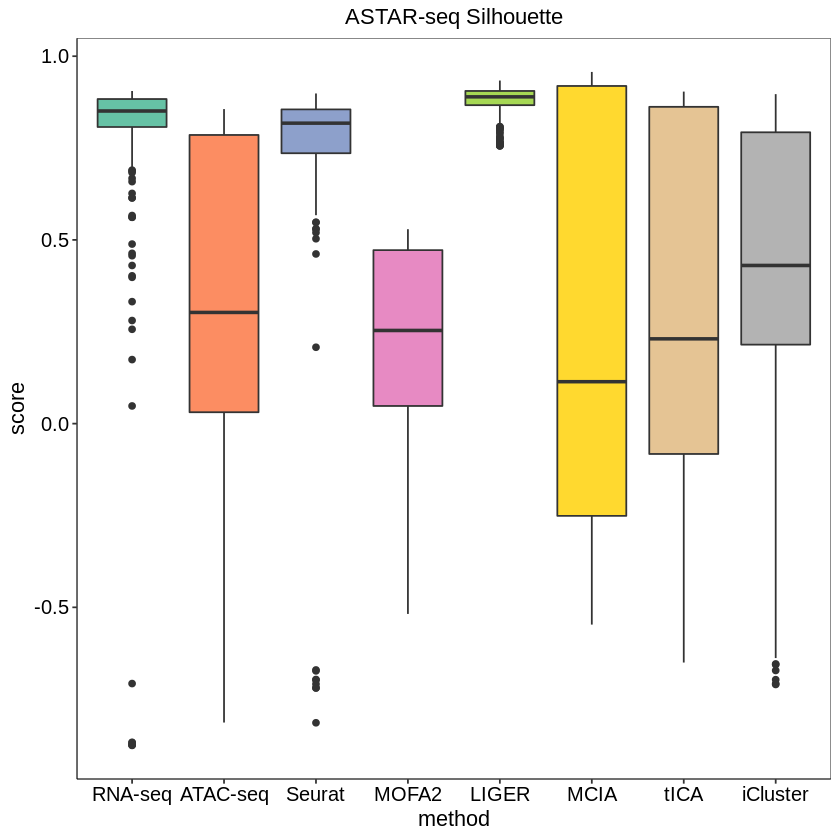

In [31]:
ggplot(silhouette_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot +  labs(title = "ASTAR-seq Silhouette")

In [32]:
jpeg(file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/snare_silhoutte.jpg", width = 7, height = 7, units = "in", res = 200)
ggplot(silhouette_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot +  labs(title = "ASTAR-seq Silhouette")
dev.off()

png 
  2

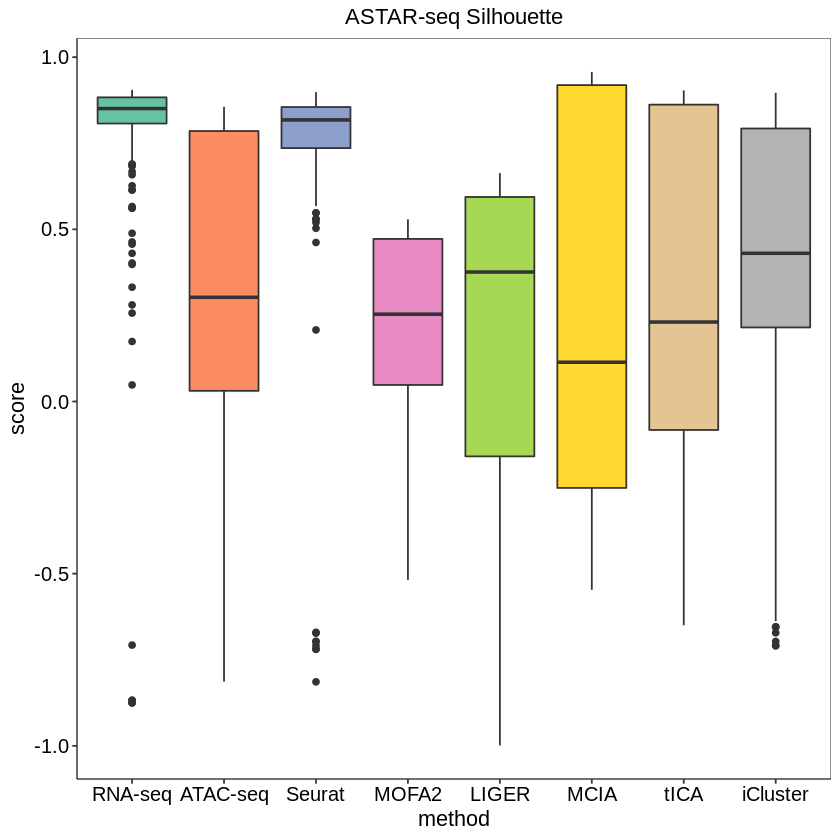

In [20]:
# 改变LIGER为所有细胞类型计算后
ggplot(silhouette_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot +  labs(title = "ASTAR-seq Silhouette")

In [33]:
# 改变LIGER为F1计算后
silhouette_sum <- silhouette_sum[which(silhouette_sum$method != "LIGER"),]

In [ ]:
silhouette_sum <- rbind(silhouette_sum, sil.liger.sum)
silhouette_sum$method <- factor(silhouette_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))

In [34]:
dim(silhouette_sum)

[1] 2646    3

In [ ]:
# 删除一些过大偏差的值

In [36]:
x <- sil.liger.sum$score[!sil.liger.sum$score %in% boxplot.stats(sil.liger.sum$score)$out]

In [38]:
head(sil.liger.sum)

,cluster,score,method
,<dbl>,<dbl>,<chr>
1,2,-0.5234939,LIGER
2,2,-1.2782107,LIGER
3,2,-0.6111234,LIGER
4,2,-0.9092301,LIGER
5,2,-0.6592883,LIGER
6,2,-0.5814859,LIGER


In [37]:
length(sil.liger.sum$score)
length(x)

[1] 728

[1] 626

In [40]:
sil.liger.sum0 <- sil.liger.sum[1:626,]
sil.liger.sum0$score <- x
silhouette_sum <- silhouette_sum[which(silhouette_sum$method != "LIGER"),]
silhouette_sum <- rbind(silhouette_sum, sil.liger.sum0)
silhouette_sum$method <- factor(silhouette_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))

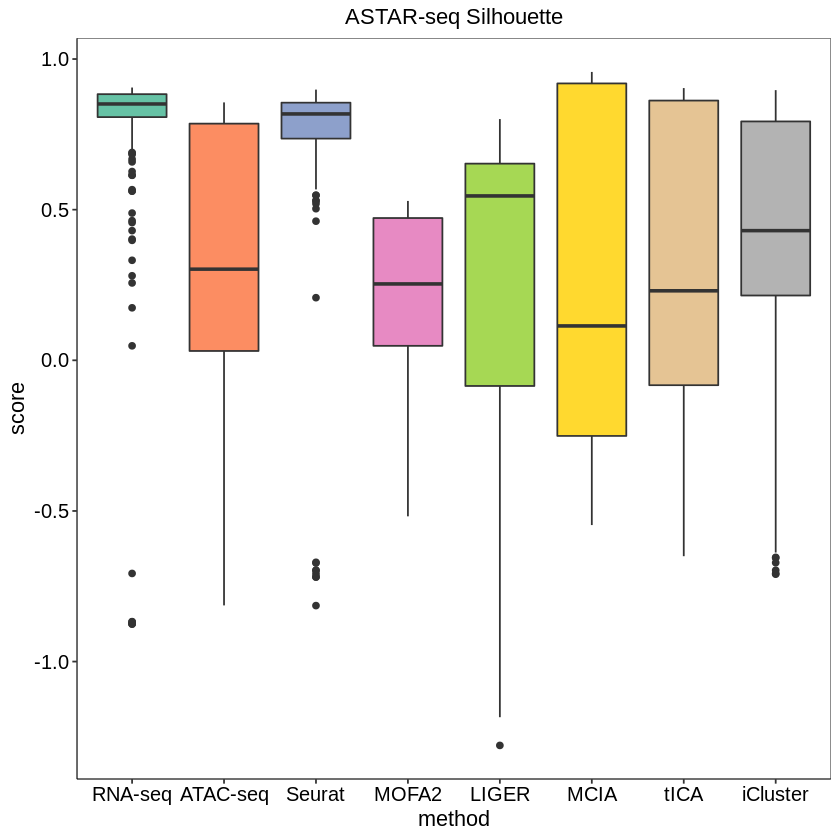

In [41]:
ggplot(silhouette_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot +  labs(title = "ASTAR-seq Silhouette")

In [70]:
saveRDS(silhouette_sum, file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_silhouette_sum.rds")

In [ ]:
## 逆辛普森指数

In [43]:
library(lisi)

In [35]:
clusters <- data.frame(label1 = as.integer(as.factor(cluster)))

In [ ]:
# RNA

In [36]:
lisi_rna <- compute_lisi(distance.rna, clusters, c('label1'))
lisi_rna[,2] <- "RNA-seq"
colnames(lisi_rna) <- c("score", "method")
lisi_rna$cluster <- clusters$label1
mean(lisi_rna[,1])
median(lisi_rna[,1])

[1] 1.060435

[1] 1

In [37]:
# ATAC
lisi_atac <- compute_lisi(distance.atac, clusters, c('label1'))
lisi_atac[,2] <- "ATAC-seq"
colnames(lisi_atac) <- c("score", "method")
lisi_atac$cluster <- clusters$label1
mean(lisi_atac[,1])
median(lisi_atac[,1])

[1] 1.214537

[1] 1.099768

In [38]:
# Seurat
lisi_seurat <- compute_lisi(as.data.frame(distance.seurat), clusters, c('label1'))
lisi_seurat[,2] <- "Seurat"
colnames(lisi_seurat) <- c("score", "method")
lisi_seurat$cluster <- clusters$label1
mean(lisi_seurat[,1])
median(lisi_seurat[,1])

[1] 1.027929

[1] 1

In [39]:
# mofa
lisi_mofa <- compute_lisi(mofa@dim_red$UMAP[,c(2,3)], clusters, c('label1'))
lisi_mofa[,2] <- "MOFA2"
colnames(lisi_mofa) <- c("score", "method")
lisi_mofa$cluster <- clusters$label1
mean(lisi_mofa[,1])
median(lisi_mofa[,1])

[1] 1.369382

[1] 1.313347

In [41]:
# liger
lisi_liger <- compute_lisi(liger@tsne.coords[351:728,], clusters, c('label1'))
lisi_liger[,2] <- "LIGER"
colnames(lisi_liger) <- c("score", "method")
lisi_liger$cluster <- clusters$label1
mean(lisi_liger[,1])
median(lisi_liger[,1])

[1] 1

[1] 1

In [50]:
clusters <- data.frame(label1 = as.integer(as.factor(as.character(cluster))))

In [51]:
# liger
lisi_liger <- compute_lisi(liger@tsne.coords, clusters, c('label1'))
lisi_liger[,2] <- "LIGER"
colnames(lisi_liger) <- c("score", "method")
lisi_liger$cluster <- clusters$label1
mean(lisi_liger[,1])
median(lisi_liger[,1])

[1] 1.033314

[1] 1

In [52]:
head(lisi_liger)

,score,method,cluster
,<dbl>,<chr>,<int>
1,1.000040,LIGER,2
2,1.120934,LIGER,2
3,1.000049,LIGER,2
4,1.014975,LIGER,2
5,1.000198,LIGER,2
6,1.000184,LIGER,2


In [53]:
clusters_cell <- data.frame(label1 = as.integer(as.factor(as.character(cluster_cell))))

In [61]:
# liger batch
lisi_liger_score <- compute_lisi(liger@tsne.coords, clusters_cell, c('label1'))

In [58]:
summary(lisi_liger0)

     label1     
 Min.   :1.000  
 1st Qu.:1.000  
 Median :1.000  
 Mean   :1.004  
 3rd Qu.:1.000  
 Max.   :1.205  

In [65]:
lisi_liger0 <- lisi_liger
# F1=2SILcell type (1 − SILbatch) / (1 − SILbatch + SILcell type)
F1 = 2 * lisi_liger$score * (1 - lisi_liger_score$label1) / (1 - lisi_liger_score$label1 + lisi_liger$score)
lisi_liger0$score <- F1
mean(lisi_liger0[,1])
median(lisi_liger0[,1])

[1] -0.009460573

[1] 0

In [67]:
summary(F1)

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.4947622 -0.0000002  0.0000000 -0.0094606  0.0000000  0.0000000 

In [42]:
# mcia
lisi_mcia <- compute_lisi(umap_mcia_df, clusters, c('label1'))
lisi_mcia[,2] <- "MCIA"
colnames(lisi_mcia) <- c("score", "method")
lisi_mcia$cluster <- clusters$label1
mean(lisi_mcia[,1])
median(lisi_mcia[,1])

[1] 1.191205

[1] 1.137981

In [43]:
# tICA
lisi_tica <- compute_lisi(umap_tica_df, clusters, c('label1'))
lisi_tica[,2] <- "tICA"
colnames(lisi_tica) <- c("score", "method")
lisi_tica$cluster <- clusters$label1
mean(lisi_tica[,1])
median(lisi_tica[,1])

[1] 1.232137

[1] 1.121605

In [44]:
# iCluster
lisi_icluster <- compute_lisi(umap_icluster_df, clusters, c('label1'))
lisi_icluster[,2] <- "iCluster"
colnames(lisi_icluster) <- c("score", "method")
lisi_icluster$cluster <- clusters$label1
mean(lisi_icluster[,1])
median(lisi_icluster[,1])

[1] 1.30297

[1] 1.17107

In [45]:
lisi_sum <- rbind(lisi_rna, lisi_atac, lisi_seurat, lisi_mofa, lisi_liger, lisi_mcia, lisi_tica, lisi_icluster)

In [46]:
lisi_sum$method <- factor(lisi_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))

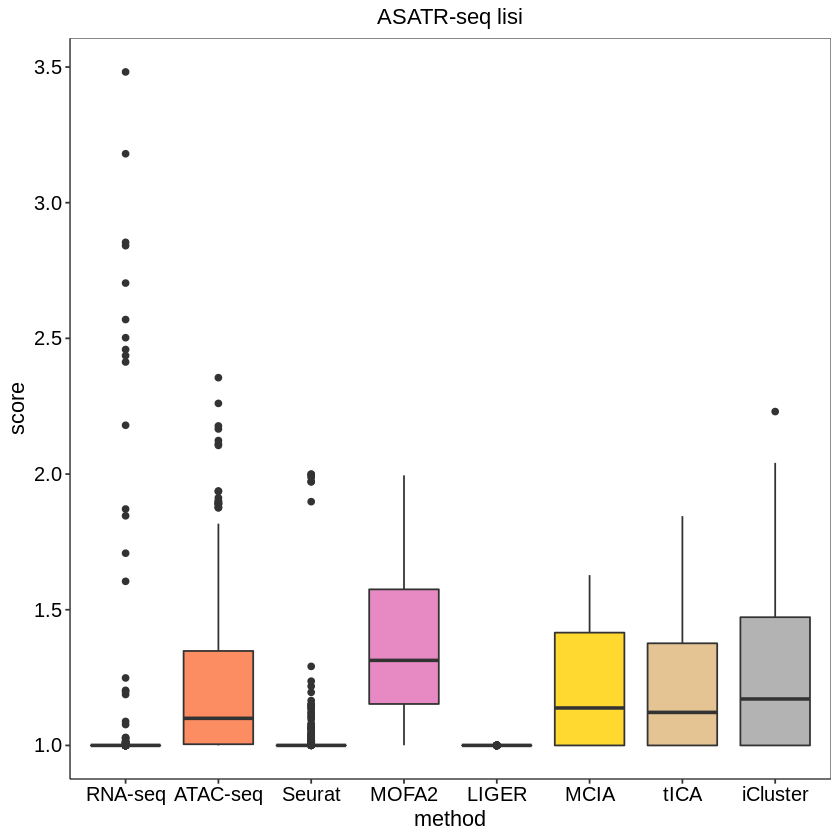

In [47]:
ggplot(lisi_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot + labs(title = "ASATR-seq lisi")

In [48]:
jpeg(file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_lisi.jpg", width = 7, height = 7, units = "in", res = 200)
ggplot(lisi_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot + labs(title = "ASATR-seq lisi")
dev.off()

png 
  2

In [49]:
saveRDS(lisi_sum, file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_lisi_sum.rds")

In [54]:
lisi_sum <- readRDS(file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_lisi_sum.rds")

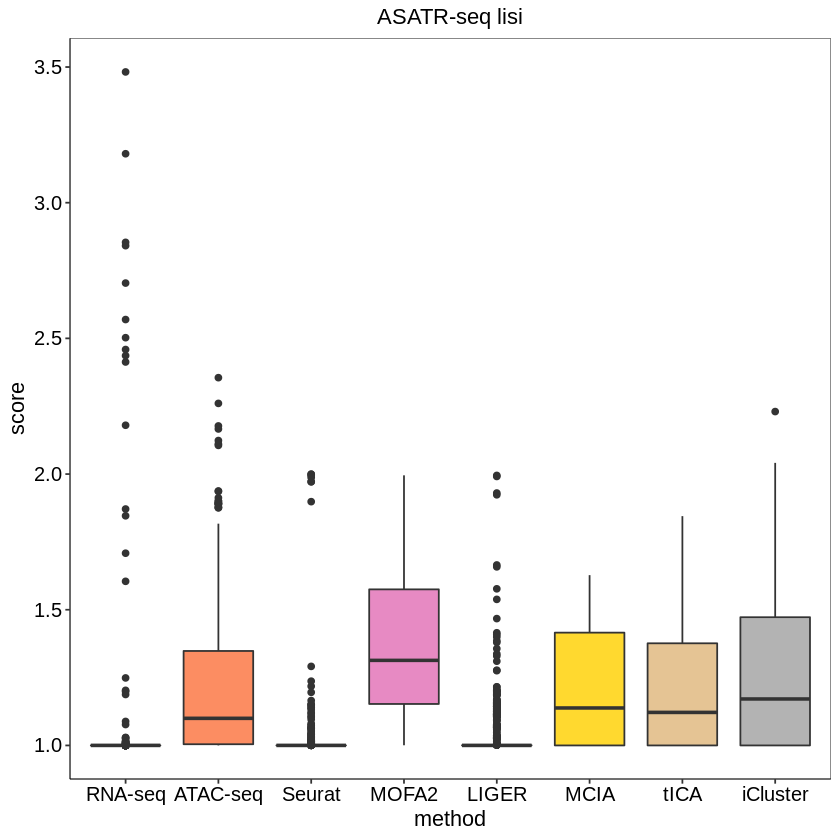

In [68]:
lisi_sum <- lisi_sum[which(lisi_sum$method != "LIGER"),]
lisi_sum <- rbind(lisi_sum, lisi_liger)
lisi_sum$method <- factor(lisi_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))
ggplot(lisi_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot + labs(title = "ASATR-seq lisi")

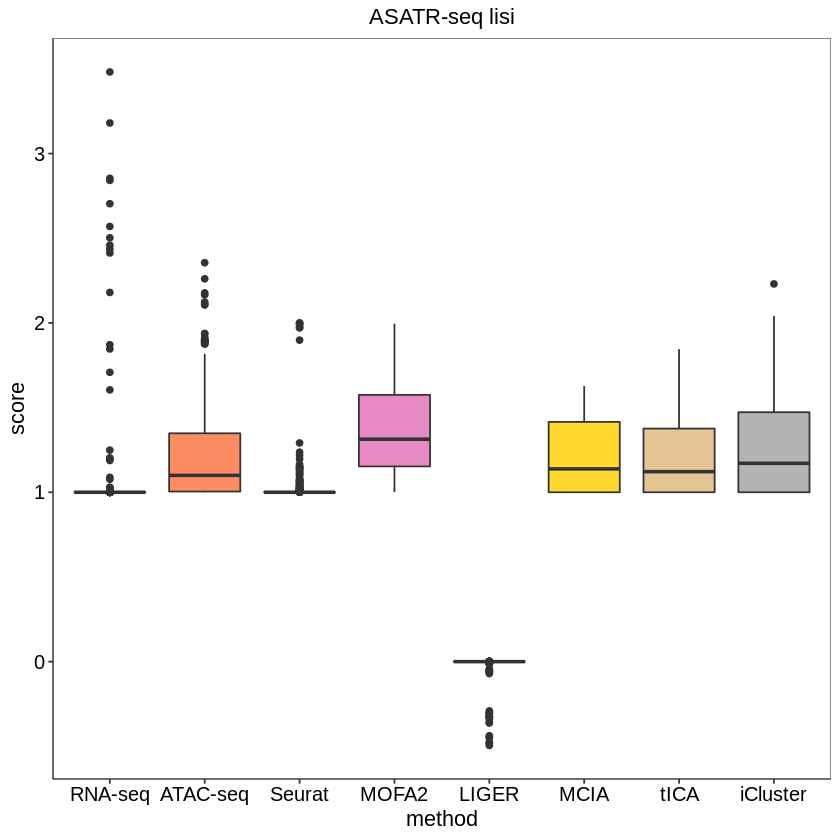

In [66]:
# liger F1 score
lisi_sum <- lisi_sum[which(lisi_sum$method != "LIGER"),]
lisi_sum <- rbind(lisi_sum, lisi_liger0)
lisi_sum$method <- factor(lisi_sum$method, levels = c("RNA-seq", "ATAC-seq", "Seurat", "MOFA2", "LIGER", "MCIA", "tICA", "iCluster"))
ggplot(lisi_sum, aes(method, score)) +
    geom_boxplot(aes(fill = method), notch = FALSE) +
    scale_fill_brewer(palette = "Set2") +
    theme_classic() + theme_boxplot + labs(title = "ASATR-seq lisi")

In [69]:
saveRDS(lisi_sum, file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_lisi_sum.rds")